## Load Data

In [18]:
airbnb_data <- read.csv("AirBnB.csv", header = T, na.strings = "") # set "" to NA
airbnb_data

host_id,host_name,host_since_year,host_since_anniversary,Customer.Since,Age.in.years,id,neighbourhood_cleansed,city,city_translated,⋯,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1662,Chloe,2008,8/11,8/11/08,8.93,304958,Westerpark,Amsterdam,Amsterdam,⋯,within a day,0.8,11,98,10,10,9,10,10,10
3159,Daniel,2008,9/24,9/24/08,8.80,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,Amsterdam,⋯,within an hour,1,108,97,10,10,10,10,9,10
3718,Britta,2008,10/19,10/19/08,8.74,103026,De Baarsjes - Oud-West,Amsterdam,Amsterdam,⋯,within a few hours,1,15,92,9,9,10,10,9,9
4716,Stefan,2008,11/30,11/30/08,8.62,550017,Centrum-Oost,Amsterdam,Amsterdam,⋯,within a day,1,20,97,10,10,10,10,10,10
5271,Tyler,2008,12/17,12/17/08,8.57,4728389,Centrum-West,Amsterdam,Amsterdam,⋯,within a day,0.89,1,100,8,10,8,10,10,6
5271,Tyler,2008,12/17,12/17/08,8.57,5500954,Centrum-West,Amsterdam,Amsterdam,⋯,within a day,0.9,0,NA,NA,NA,NA,NA,NA,NA
5271,Tyler,2008,12/17,12/17/08,8.57,5181918,Centrum-West,Amsterdam,Amsterdam,⋯,within a day,0.89,4,95,9,9,9,10,10,9
5988,Ramona,2009,1/4,1/4/09,8.53,2774924,Zuid,Amsterdam,Amsterdam,⋯,within an hour,1,33,95,9,10,10,10,10,9
9616,Laura,2009,3/9,3/9/09,8.35,23651,De Pijp - Rivierenbuurt,Amsterdam,Amsterdam,⋯,within a day,1,36,96,9,10,10,10,9,9


In [19]:
colnames(airbnb_data)

[1] "host_id"                                       
 [2] "host_name"                                     
 [3] "host_since_year"                               
 [4] "host_since_anniversary"                        
 [5] "Customer.Since"                                
 [6] "Age.in.years"                                  
 [7] "id"                                            
 [8] "neighbourhood_cleansed"                        
 [9] "city"                                          
[10] "city_translated"                               
[11] "state"                                         
[12] "state_translated"                              
[13] "zipcode"                                       
[14] "country"                                       
[15] "latitude"                                      
[16] "longitude"                                     
[17] "property_type"                                 
[18] "room_type"                                     
[19] "accommodates"                                  
[20] "bathrooms"                                     
[21] "bedrooms"                                      
[22] "beds"                                          
[23] "bed_type"                                      
[24] "price"                                         
[25] "guests_included"                               
[26] "extra_people"                                  
[27] "minimum_nights"                                
[28] "customers...50..review.rate"                   
[29] "X.Daily.Rev.per.2.guests..unless.limited.to.1."
[30] "Min.Nights"                                    
[31] "Total.Rev"                                     
[32] "host_response_time"                            
[33] "host_response_rate"                            
[34] "number_of_reviews"                             
[35] "review_scores_rating"                          
[36] "review_scores_accuracy"                        
[37] "review_scores_cleanliness"                     
[38] "review_scores_checkin"                         
[39] "review_scores_communication"                   
[40] "review_scores_location"                        
[41] "review_scores_value"

## Clean Data

#### Get corresponding response and predictor columns

In [20]:
# need to replace categorical data with indicator functions
# property_apmt = 1 if "Apartment", else = 0
# property_house = 1 if "House", else = 0
# property_boat = 1 if "Boat", else = 0
# if property_apmt, property_house, and property_boat are 0, then property is "Bed & Breakfast"
airbnb_data$property_apmt <- ifelse(airbnb_data$property_type=="Apartment", "1", "0")
airbnb_data$property_house <- ifelse(airbnb_data$property_type=="House", "1", "0")
airbnb_data$property_boat <- ifelse(airbnb_data$property_type=="Boat", "1", "0")
airbnb_data$delete <- ifelse(airbnb_data$property_type=="Apartment"|airbnb_data$property_type=="House"|
                             airbnb_data$property_type=="Boat"|airbnb_data$property_type=="Bed & Breakfast", "0", NA)

# room_entire = 1 if "Entire home/apt", else = 0
# room_private = 1 if "Private room", else = 0
# if both room_entire and room_private are 0, then room is "Shared room"
airbnb_data$room_entire <- ifelse(airbnb_data$room_type == "Entire home/apt", "1", "0")
airbnb_data$room_private <- ifelse(airbnb_data$room_type == "Private room", "1", "0")

In [21]:
new_data <- subset(as.data.frame(airbnb_data), 
                   select = c(price, review_scores_rating, minimum_nights, property_apmt, 
                              property_house, property_boat, delete, room_private, room_entire, accommodates))

In [22]:
head(new_data)
dim(new_data)

,price,review_scores_rating,minimum_nights,property_apmt,property_house,property_boat,delete,room_private,room_entire,accommodates
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,$130,98,4,1,0,0,0,0,1,4
2,$59,97,3,1,0,0,0,1,0,2
3,$95,92,3,1,0,0,0,0,1,4
4,$100,97,2,1,0,0,0,0,1,2
5,$250,100,2,1,0,0,0,0,1,6
6,$140,NA,2,1,0,0,0,1,0,4


[1] 7833   10

#### Remove rows that contains NA

In [23]:
# Remove rows with NA values
clean_data <- na.omit(new_data)

In [24]:
head(clean_data)
dim(clean_data)

,price,review_scores_rating,minimum_nights,property_apmt,property_house,property_boat,delete,room_private,room_entire,accommodates
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,$130,98,4,1,0,0,0,0,1,4
2,$59,97,3,1,0,0,0,1,0,2
3,$95,92,3,1,0,0,0,0,1,4
4,$100,97,2,1,0,0,0,0,1,2
5,$250,100,2,1,0,0,0,0,1,6
7,$115,95,1,1,0,0,0,1,0,2


[1] 6016   10

#### Check if there are still any empty entries

In [25]:
has_empty_entries <- sum(is.na(clean_data)) > 0
has_empty_entries

[1] FALSE

#### Remove duplicates

In [26]:
unique(clean_data)

,price,review_scores_rating,minimum_nights,property_apmt,property_house,property_boat,delete,room_private,room_entire,accommodates
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,$130,98,4,1,0,0,0,0,1,4
2,$59,97,3,1,0,0,0,1,0,2
3,$95,92,3,1,0,0,0,0,1,4
4,$100,97,2,1,0,0,0,0,1,2
5,$250,100,2,1,0,0,0,0,1,6
7,$115,95,1,1,0,0,0,1,0,2
8,$80,95,3,0,1,0,0,1,0,2
9,$80,96,6,1,0,0,0,1,0,3
10,$90,93,3,0,1,0,0,0,1,2


In [27]:
install.packages("dplyr")

library(dplyr)

Installing package into ‘/opt/r’
(as ‘lib’ is unspecified)



In [28]:
new_clean_data <- subset(clean_data %>% distinct(), # remove duplicate rows and only keep the distinct rows
                         select=c(price, review_scores_rating, minimum_nights, property_apmt, 
                              property_house, property_boat, room_private, room_entire, accommodates))
dim(new_clean_data)

[1] 4567    9

#### Get data summary

In [29]:
summary(new_clean_data)

    price           review_scores_rating minimum_nights   property_apmt     
 Length:4567        Min.   : 20.00       Min.   : 1.000   Length:4567       
 Class :character   1st Qu.: 90.00       1st Qu.: 2.000   Class :character  
 Mode  :character   Median : 94.00       Median : 2.000   Mode  :character  
                    Mean   : 92.53       Mean   : 2.574                     
                    3rd Qu.: 98.00       3rd Qu.: 3.000                     
                    Max.   :100.00       Max.   :27.000                     
 property_house     property_boat      room_private       room_entire       
 Length:4567        Length:4567        Length:4567        Length:4567       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

#### Convert random variables to appropriate data types

In [30]:
columns_to_convert <- c("price", "room_entire", "room_private", "property_apmt", "property_house", "property_boat")

for (col_name in columns_to_convert) {
  new_clean_data[, col_name] <- as.numeric(gsub("[^0-9.]", "", new_clean_data[, col_name]))
}

In [31]:
# check summary again after conversion
summary(new_clean_data)
attach(new_clean_data)

     price        review_scores_rating minimum_nights   property_apmt   
 Min.   :  19.0   Min.   : 20.00       Min.   : 1.000   Min.   :0.0000  
 1st Qu.:  80.0   1st Qu.: 90.00       1st Qu.: 2.000   1st Qu.:1.0000  
 Median : 109.0   Median : 94.00       Median : 2.000   Median :1.0000  
 Mean   : 128.1   Mean   : 92.53       Mean   : 2.574   Mean   :0.7793  
 3rd Qu.: 150.0   3rd Qu.: 98.00       3rd Qu.: 3.000   3rd Qu.:1.0000  
 Max.   :1400.0   Max.   :100.00       Max.   :27.000   Max.   :1.0000  
 property_house   property_boat      room_private     room_entire    
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.0000   Median :0.00000   Median :0.0000   Median :1.0000  
 Mean   :0.1062   Mean   :0.05737   Mean   :0.2106   Mean   :0.7826  
 3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :1.0000  

### Fit Model (Preliminary)

#### Model 

In [32]:
model1 <- lm(price ~ review_scores_rating + minimum_nights + property_apmt + property_house + property_boat
             + room_entire + room_private + accommodates)
summary(model1)
e_hat <- resid(model1)
y_hat <- fitted(model1)


Call:
lm(formula = price ~ review_scores_rating + minimum_nights + 
    property_apmt + property_house + property_boat + room_entire + 
    room_private + accommodates)

Residuals:
    Min      1Q  Median      3Q     Max 
-385.29  -31.73   -7.06   22.44  968.99 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -56.3551    15.5290  -3.629 0.000288 ***
review_scores_rating   0.6280     0.1141   5.503 3.93e-08 ***
minimum_nights         0.3617     0.4894   0.739 0.459884    
property_apmt        -15.1401     4.1651  -3.635 0.000281 ***
property_house         3.9029     4.8252   0.809 0.418639    
property_boat         -0.3190     5.5895  -0.057 0.954485    
room_entire           73.4484    10.9492   6.708 2.21e-11 ***
room_private          30.6132    11.0821   2.762 0.005761 ** 
accommodates          22.1746     0.5176  42.837  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 60.5 on 

#### Checking MLR assumptions

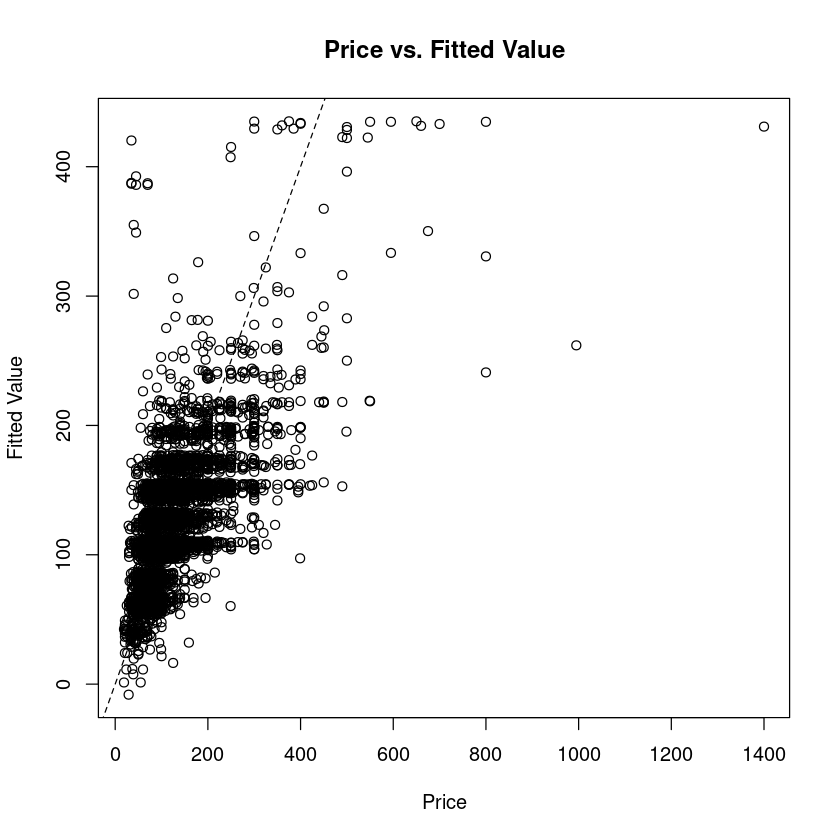

In [33]:
# 1. Conditional mean response
plot(y_hat ~ price, main="Price vs. Fitted Value", ylab="Fitted Value", xlab="Price")
abline(a=0, b=1, lty=2)

Observations: Points are along the diagonal, with scatter. However, it can be seen that there is fanning, so there is possibly a violation of constant variance. There is also clustering of points near the lower left of the plot.

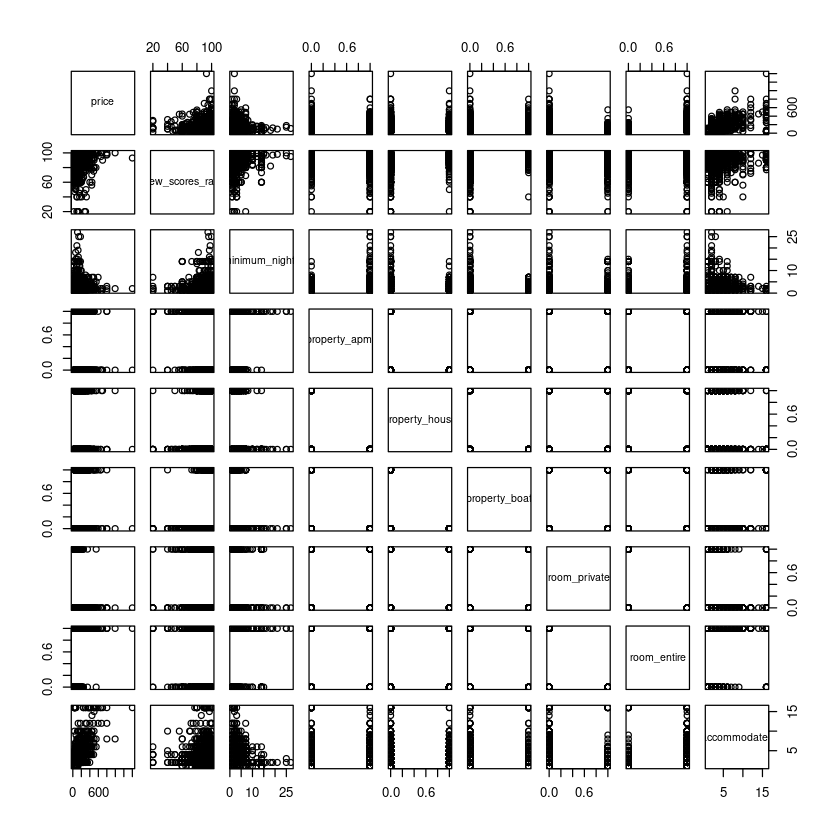

In [34]:
# 2. Conditional mean predictors
pairs(new_clean_data)

Observations: Points are either in lines (which is good), or in weird clusters. Transformations may be good.

#### Residual Plots

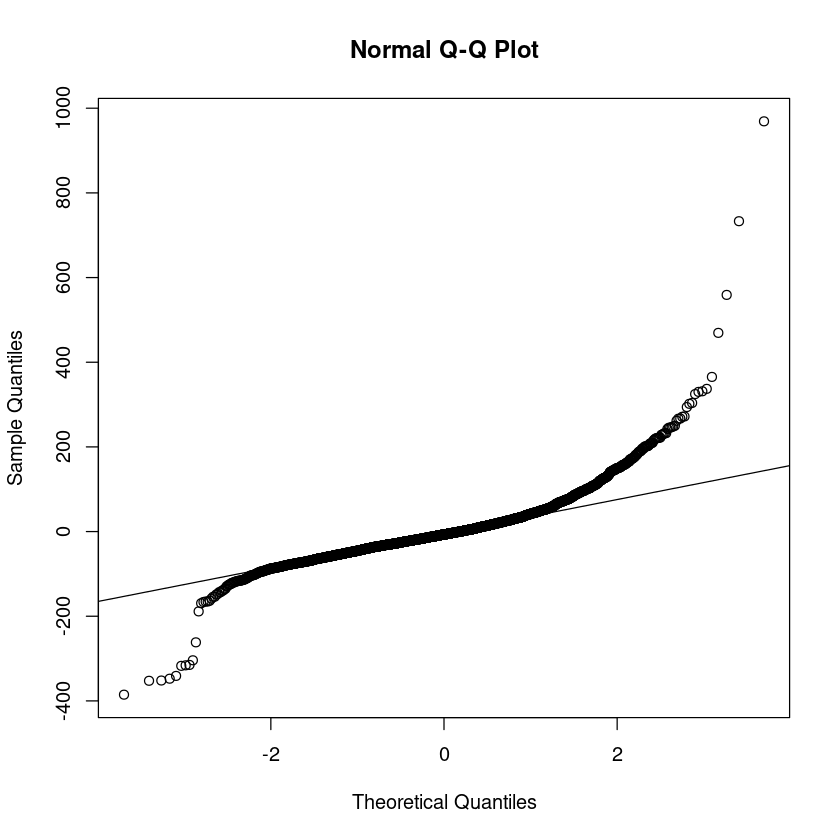

In [35]:
# Checking for normality
qqnorm(e_hat)
qqline(e_hat)

Observations: Normality seems to be relatively good, although there is still room for improvement.

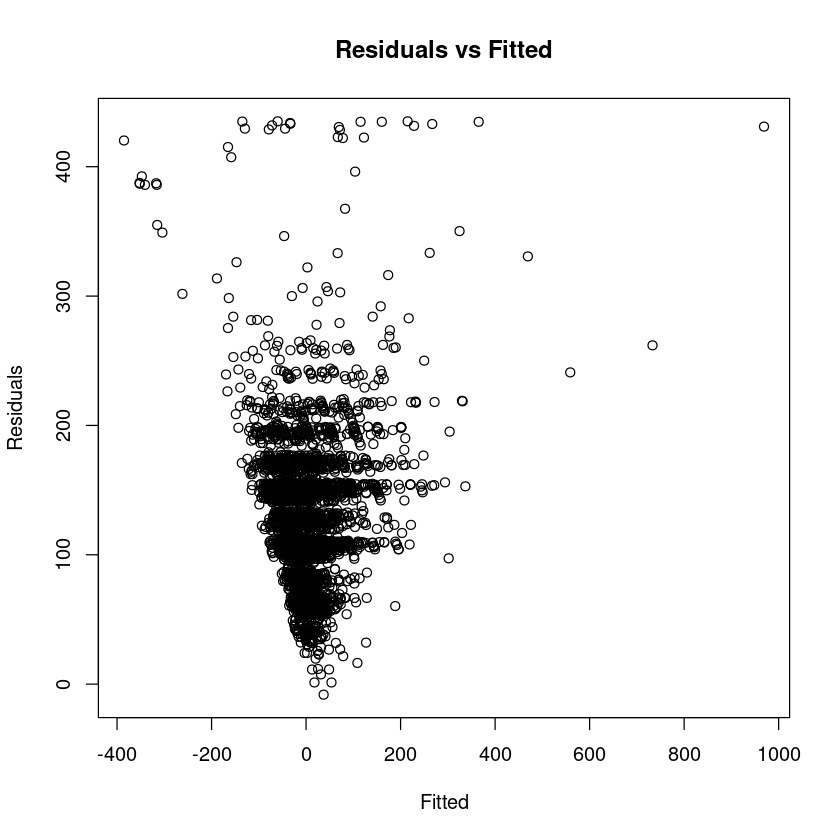

In [36]:
# Residual vs. fitted
plot(e_hat, y_hat, main="Residuals vs Fitted", ylab="Residuals", xlab="Fitted")

Observations: There is a cluster in the plot and a fanning pattern, suggesting violation of constant variance. However, this does not indicate whether there are actual violations, because this is a multiple variable linear regression.

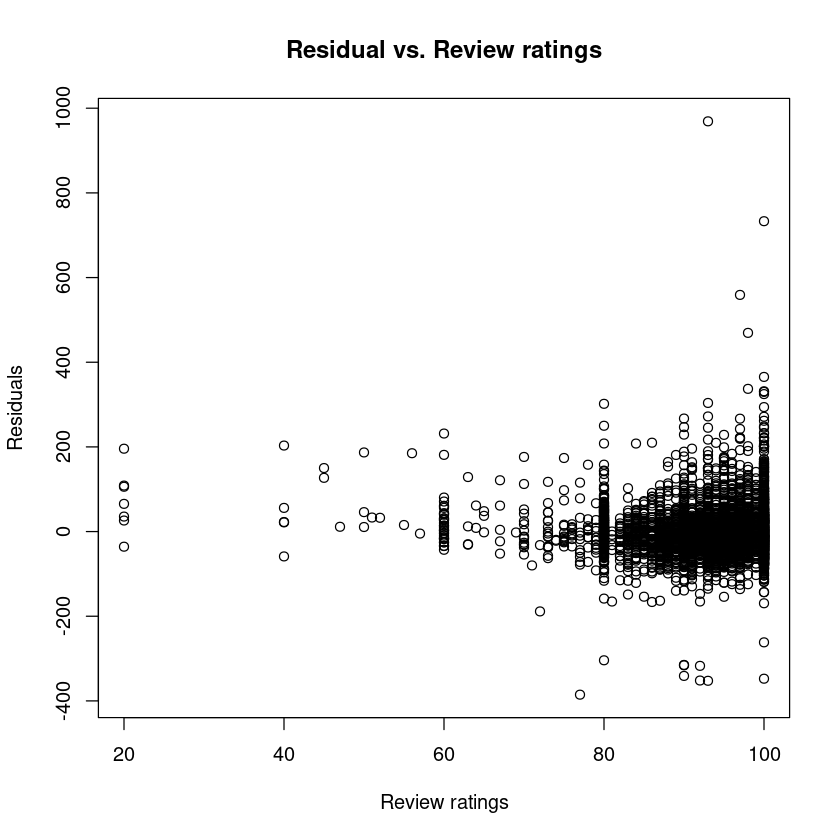

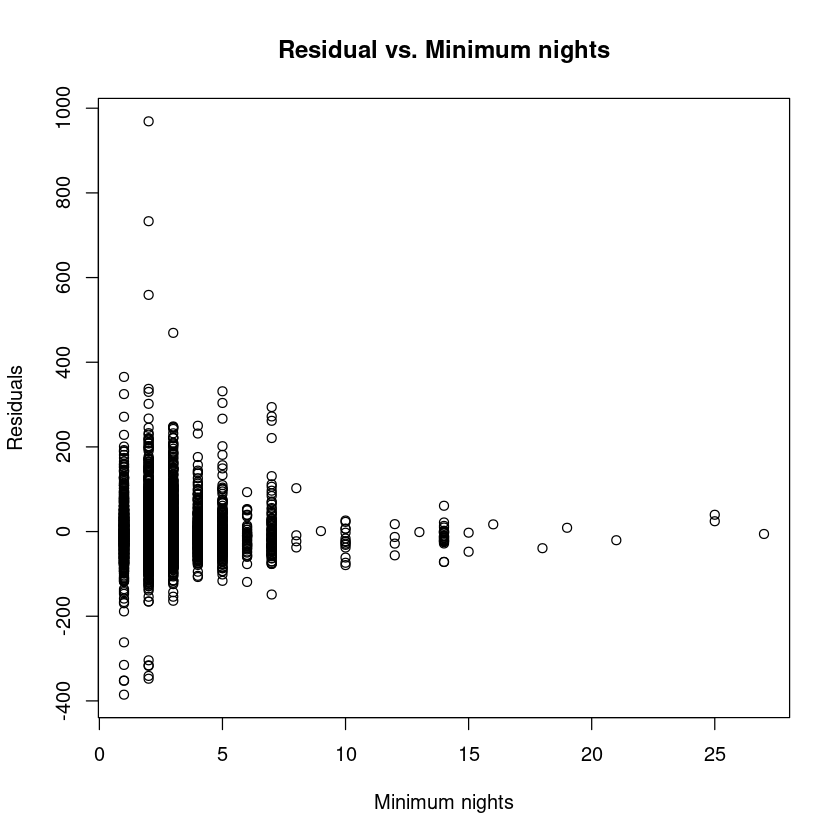

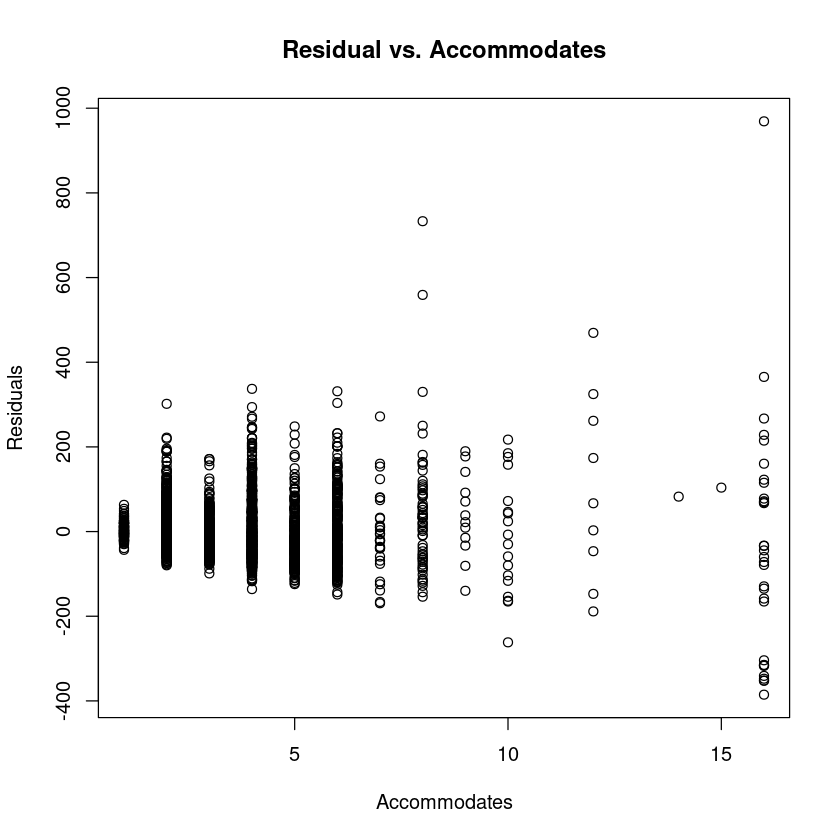

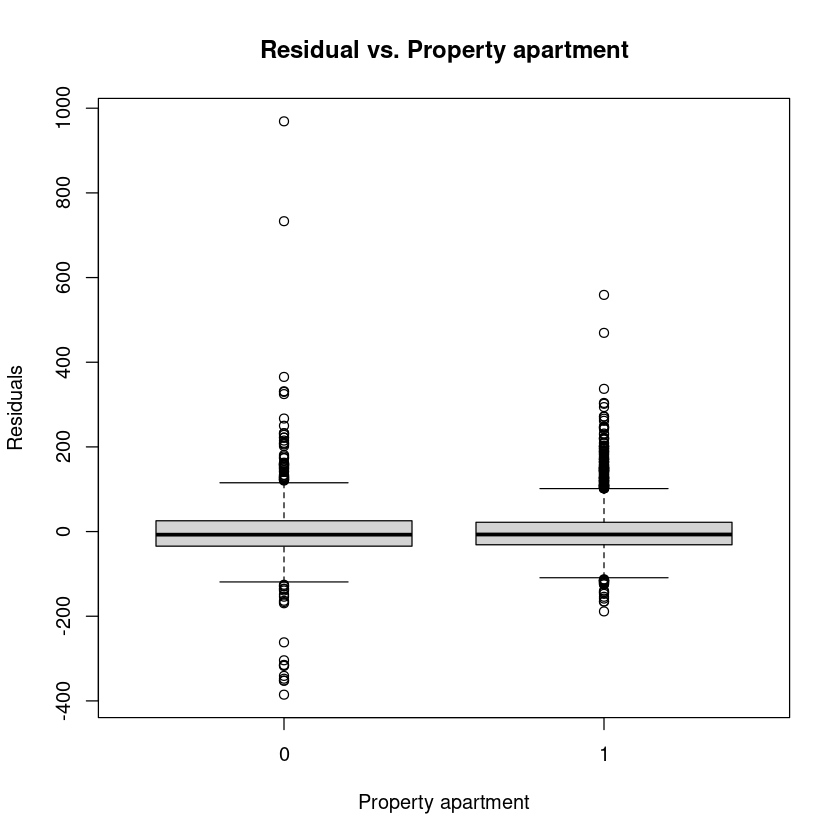

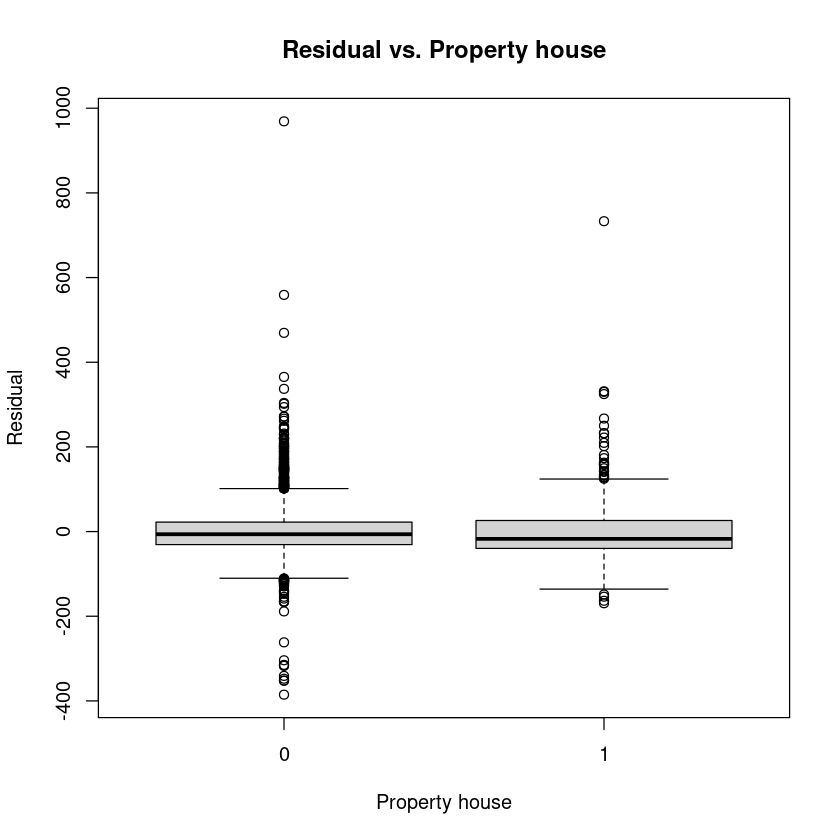

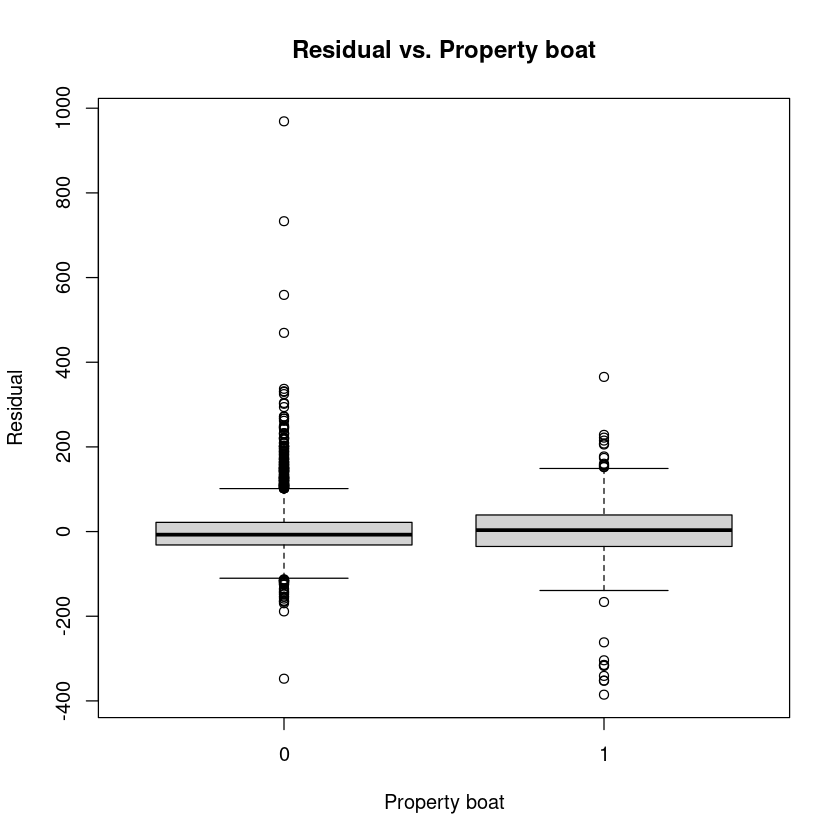

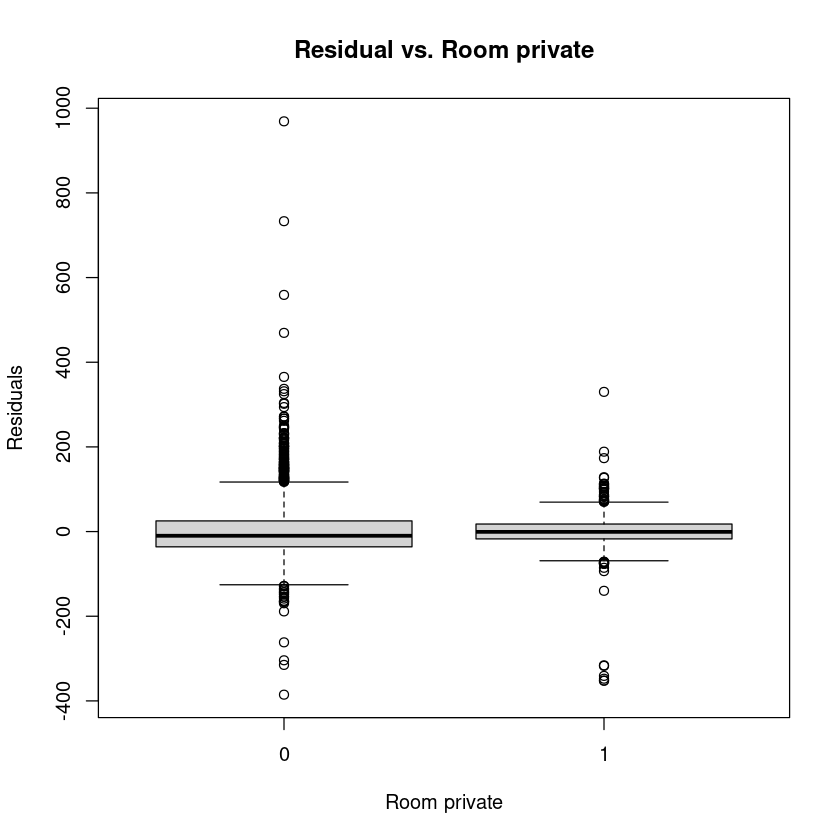

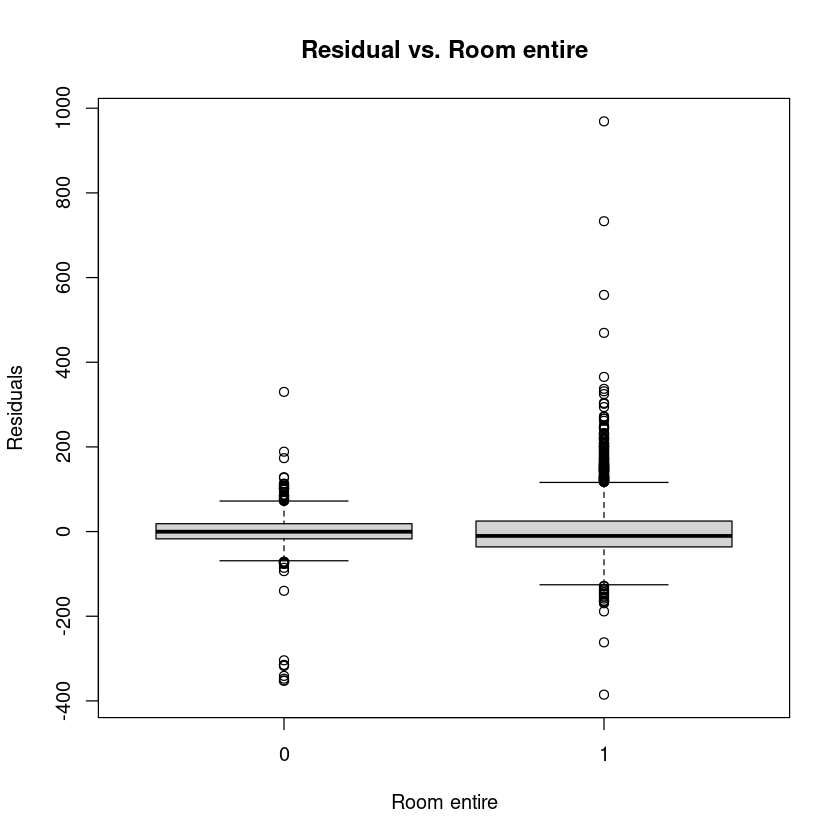

In [37]:
# Scatterplots
# Residual vs. Review ratings
plot(x=review_scores_rating, y=e_hat, main="Residual vs. Review ratings", ylab="Residuals", xlab="Review ratings")

# Residual vs. Minimum nights
plot(x=minimum_nights, y=e_hat, main="Residual vs. Minimum nights", ylab="Residuals", xlab="Minimum nights")

# Residual vs. Accommodates
plot(x=accommodates, y=e_hat, main="Residual vs. Accommodates", ylab="Residuals", xlab="Accommodates")

# Boxplots
# Residual vs. Property apartment
boxplot(e_hat ~ property_apmt , main="Residual vs. Property apartment", ylab="Residuals", xlab="Property apartment")

# Residual vs. Property house
boxplot(e_hat ~ property_house, main="Residual vs. Property house", ylab="Residual", xlab="Property house")

# Residual vs. Property boat
boxplot(e_hat ~ property_boat, main="Residual vs. Property boat", ylab="Residual", xlab="Property boat")

# Residual vs. Room private
boxplot(e_hat ~ room_private, main="Residual vs. Room private", ylab="Residuals", xlab="Room private")

# Residual vs. Room entire
boxplot(e_hat ~ room_entire, main="Residual vs. Room entire", ylab="Residuals", xlab="Room entire")

Observations: There seems to be a cluster and fanning pattern for the plots for the continuous predictor variables. These all suggests violation of constant variance. However, this does not indicate whether there are actual violations, because this is a multiple variable linear regression.

#### Histogram of the price data to check for skew

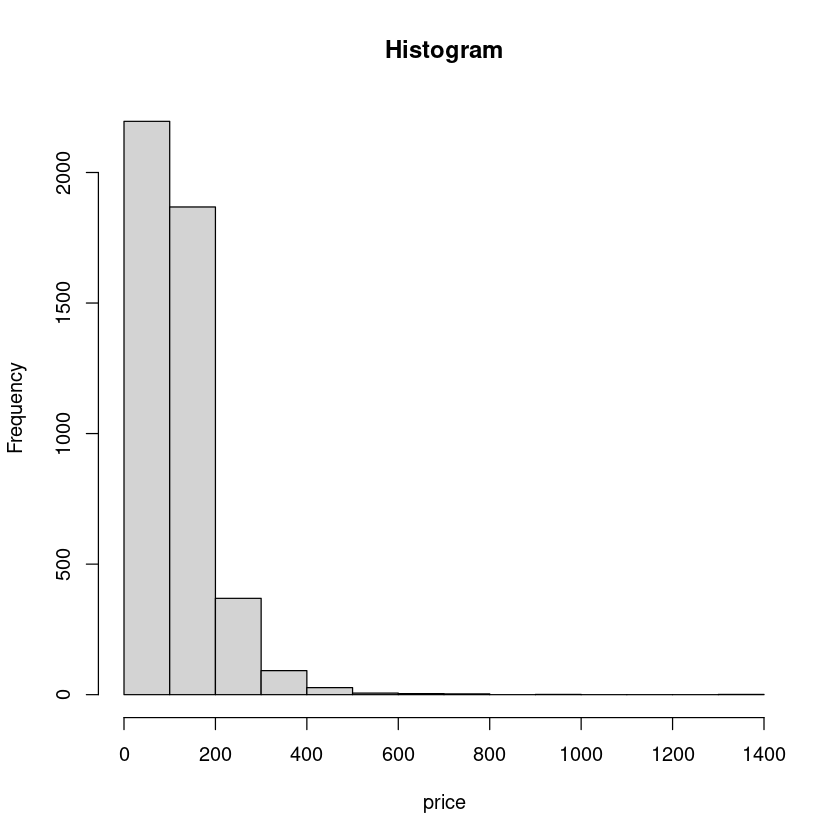

In [38]:
hist(new_clean_data$price, main="Histogram", xlab="price")

From the histogram above, the response is a right skewed, convert it to normal.

#### Convert the data so that it has a normal price distribution.

In [39]:
install.packages("MASS")
library(MASS)

Installing package into ‘/opt/r’
(as ‘lib’ is unspecified)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




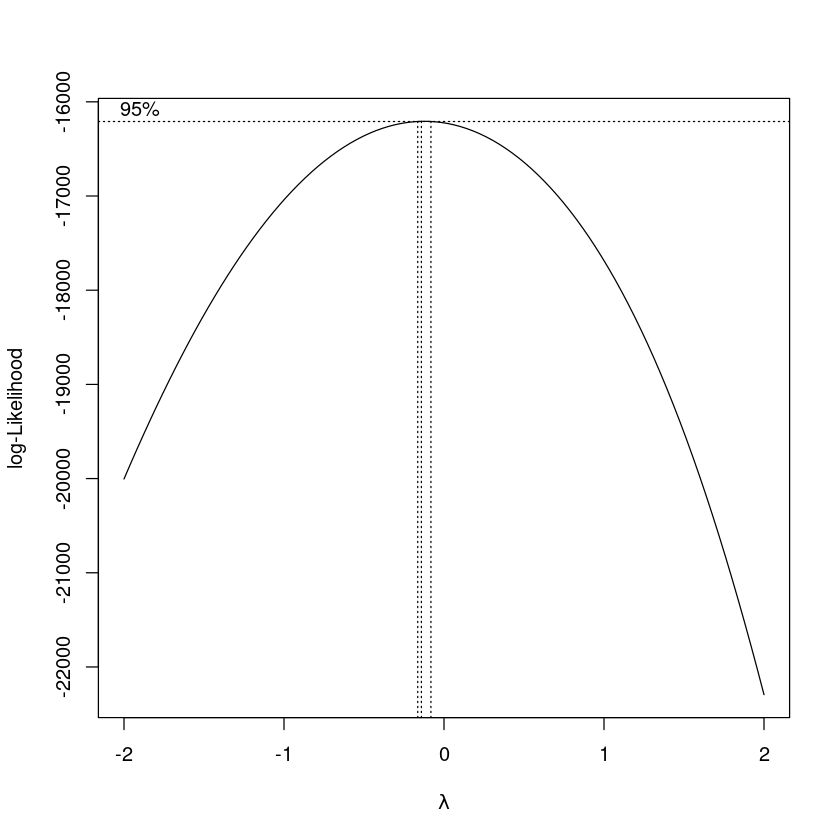

In [40]:
boxcox(lm(new_clean_data$price~1))

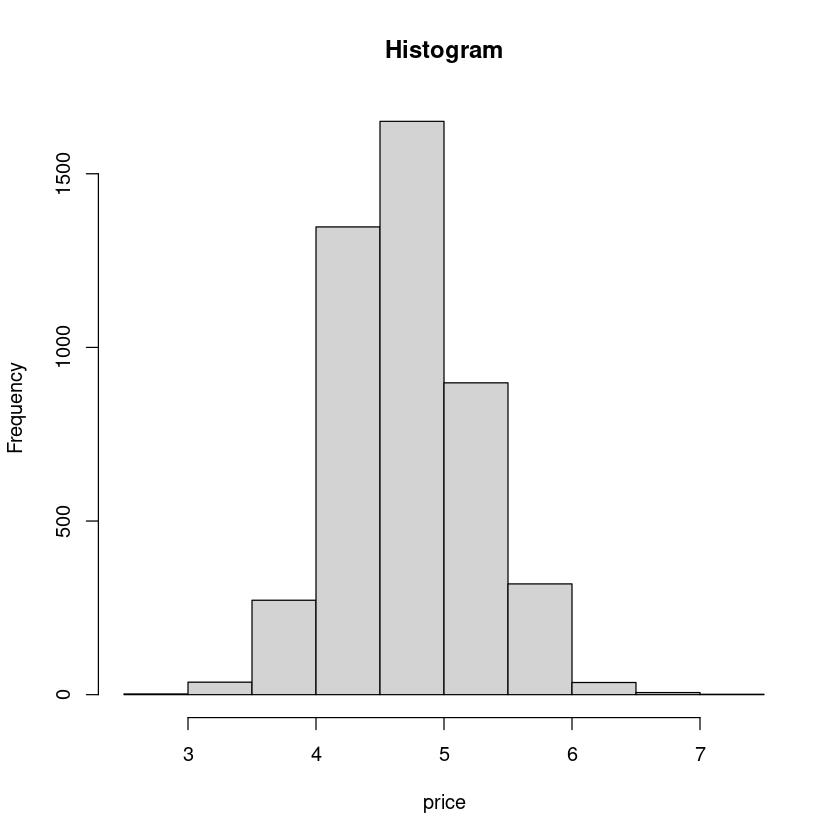

In [41]:
newprice <- log(new_clean_data$price)
hist(newprice, main="Histogram", xlab="price")

In [42]:
data <- data.frame(cbind(newprice, new_clean_data[,-1]))

In [43]:
head(data)
dim(data)

,newprice,review_scores_rating,minimum_nights,property_apmt,property_house,property_boat,room_private,room_entire,accommodates
,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,4.867534,98,4,1,0,0,0,1,4
2,4.077537,97,3,1,0,0,1,0,2
3,4.553877,92,3,1,0,0,0,1,4
4,4.605170,97,2,1,0,0,0,1,2
5,5.521461,100,2,1,0,0,0,1,6
6,4.744932,95,1,1,0,0,1,0,2


[1] 4567    9

In [44]:
summary(data)

    newprice     review_scores_rating minimum_nights   property_apmt   
 Min.   :2.944   Min.   : 20.00       Min.   : 1.000   Min.   :0.0000  
 1st Qu.:4.382   1st Qu.: 90.00       1st Qu.: 2.000   1st Qu.:1.0000  
 Median :4.691   Median : 94.00       Median : 2.000   Median :1.0000  
 Mean   :4.712   Mean   : 92.53       Mean   : 2.574   Mean   :0.7793  
 3rd Qu.:5.011   3rd Qu.: 98.00       3rd Qu.: 3.000   3rd Qu.:1.0000  
 Max.   :7.244   Max.   :100.00       Max.   :27.000   Max.   :1.0000  
 property_house   property_boat      room_private     room_entire    
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.0000   Median :0.00000   Median :0.0000   Median :1.0000  
 Mean   :0.1062   Mean   :0.05737   Mean   :0.2106   Mean   :0.7826  
 3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :1.0000  
  acco

### Fit Model (After Boxcox Transformation)

In [45]:
attach(data)

The following object is masked _by_ .GlobalEnv:

    newprice


The following objects are masked from new_clean_data:

    accommodates, minimum_nights, property_apmt, property_boat,
    property_house, review_scores_rating, room_entire, room_private




In [46]:
model2 <- lm(newprice ~ review_scores_rating + minimum_nights + property_apmt + property_house + property_boat
             + room_entire + room_private + accommodates)
summary(model2)

e_hat2 <- resid(model2)
y_hat2 <- fitted(model2)


Call:
lm(formula = newprice ~ review_scores_rating + minimum_nights + 
    property_apmt + property_house + property_boat + room_entire + 
    room_private + accommodates)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.68087 -0.25477 -0.00699  0.24469  1.41770 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.2395208  0.0988983  32.756  < 2e-16 ***
review_scores_rating  0.0054924  0.0007267   7.558 4.92e-14 ***
minimum_nights       -0.0067670  0.0031168  -2.171    0.030 *  
property_apmt        -0.1680818  0.0265256  -6.337 2.58e-10 ***
property_house       -0.0443946  0.0307298  -1.445    0.149    
property_boat        -0.0539293  0.0355970  -1.515    0.130    
room_entire           0.8739455  0.0697311  12.533  < 2e-16 ***
room_private          0.3574052  0.0705773   5.064 4.27e-07 ***
accommodates          0.1100338  0.0032967  33.377  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



#### Checking MLR Assumptions

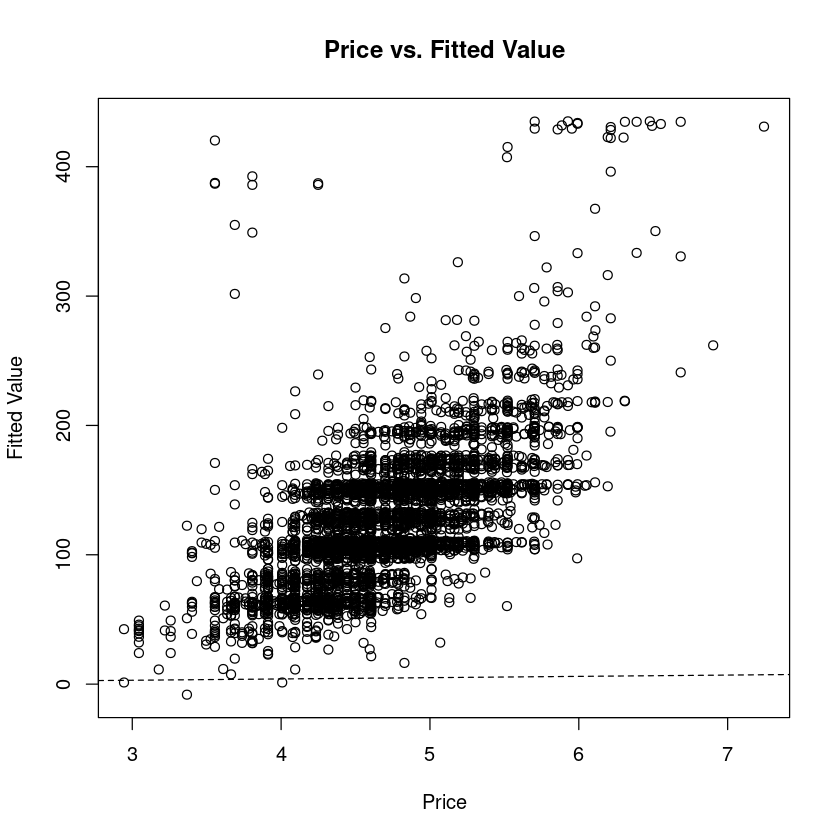

In [52]:
# 1. Conditional mean response
plot(y_hat ~ newprice, main="Price vs. Fitted Value", ylab="Fitted Value", xlab="Price")
abline(a=0, b=1, lty=2)

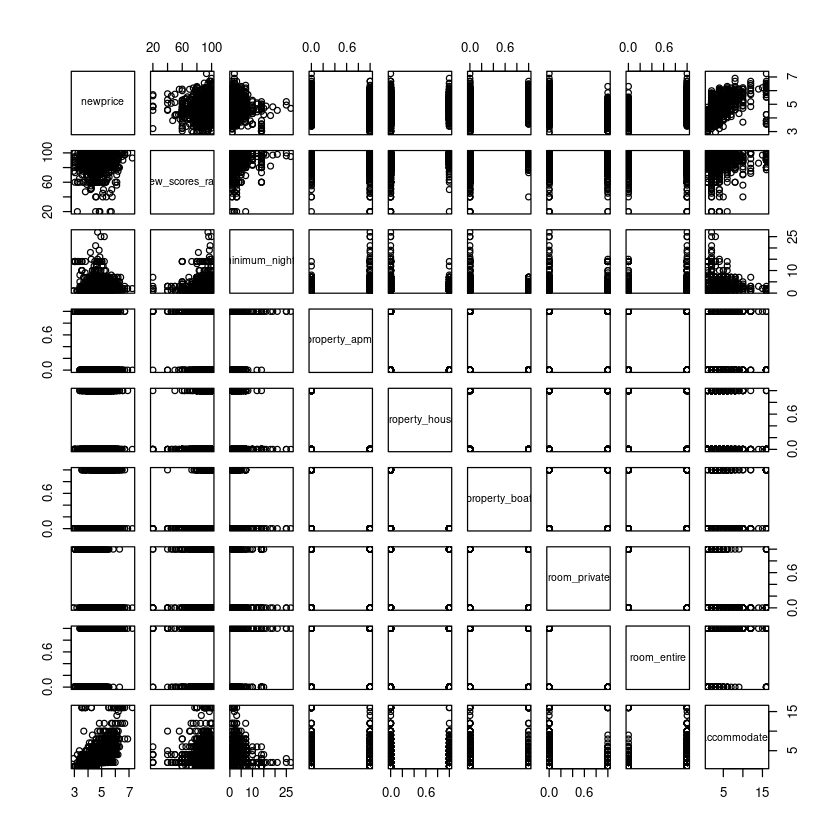

In [48]:
# 2. Conditional mean predictors
pairs(data)

#### Residual Plots

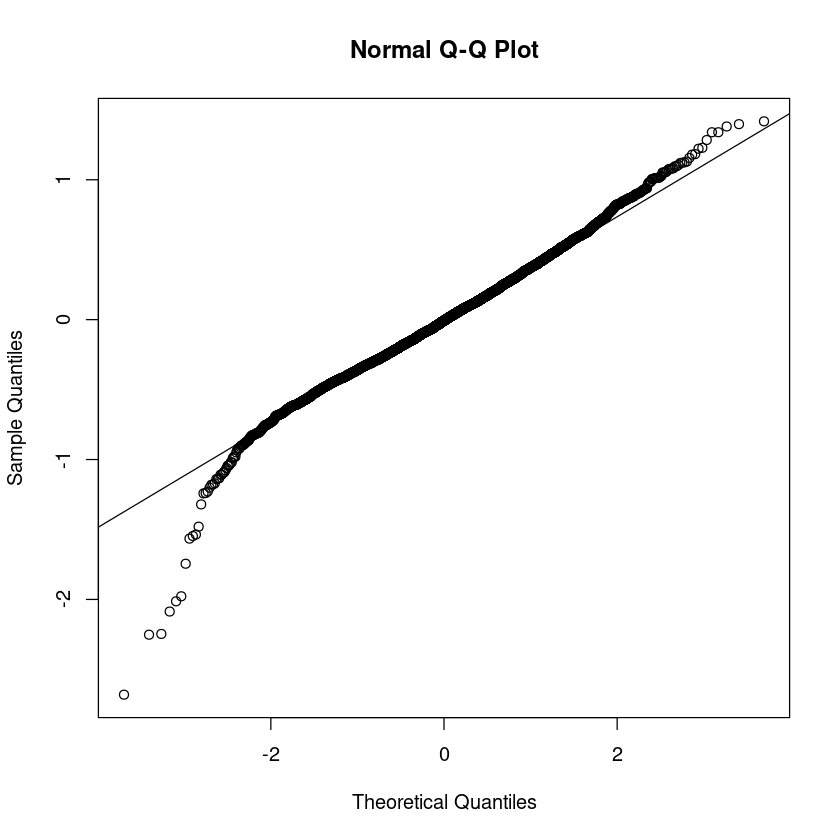

In [49]:
qqnorm(e_hat2)
qqline(e_hat2)

Observations: The normality plot seems much better than before the boxcox transformation

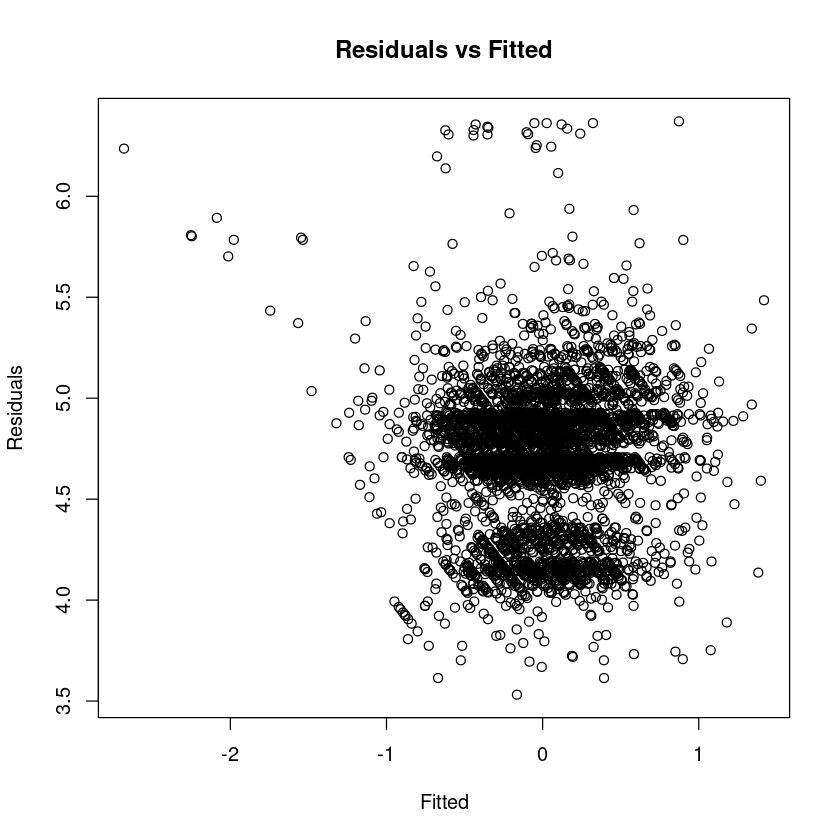

In [50]:
# Residual vs. fitted
plot(e_hat2, y_hat2, main="Residuals vs Fitted", ylab="Residuals", xlab="Fitted")

Observations: The fanning pattern seems to have been dealt with. However, now there seems to be some clustering.

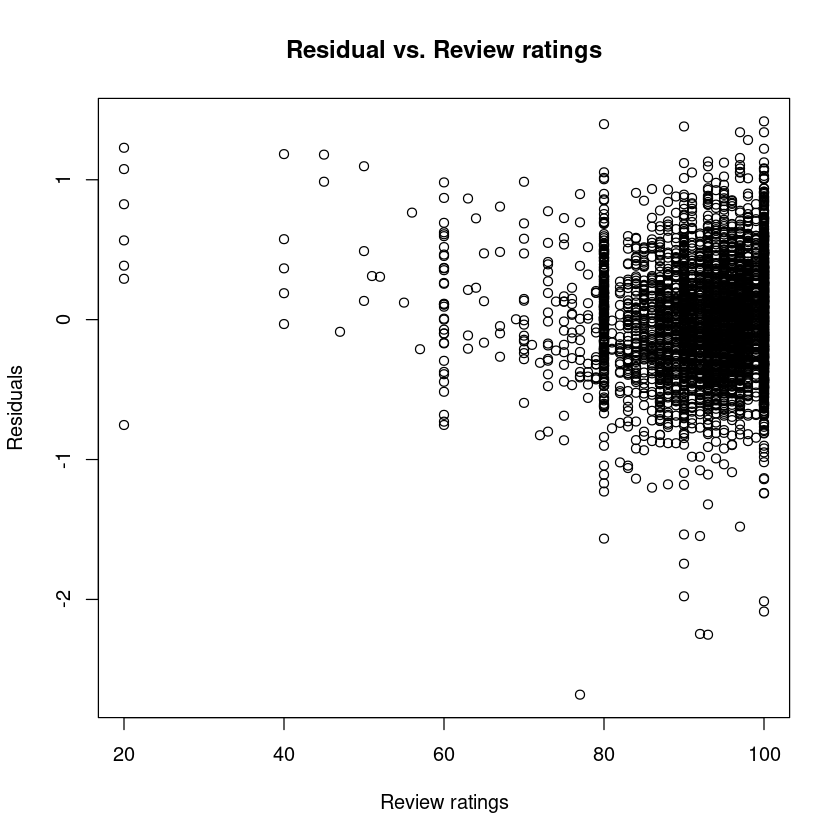

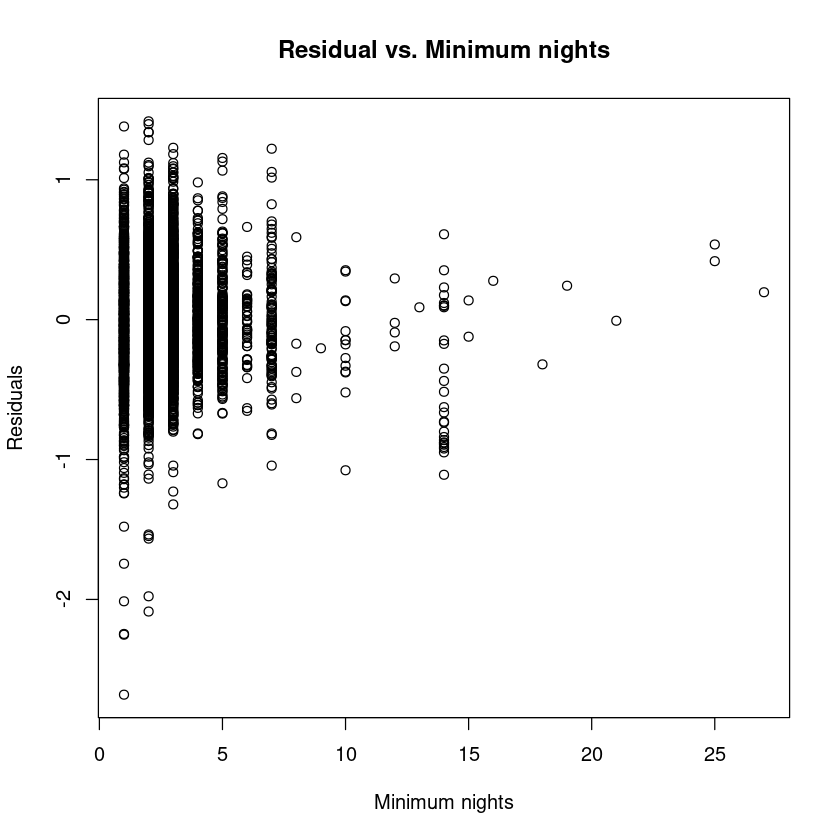

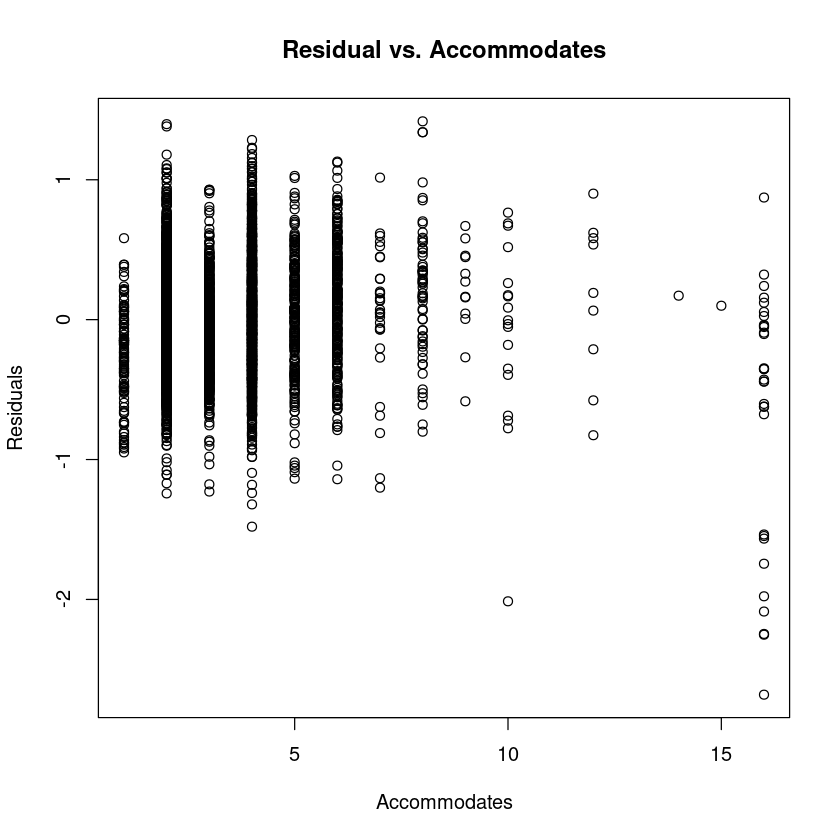

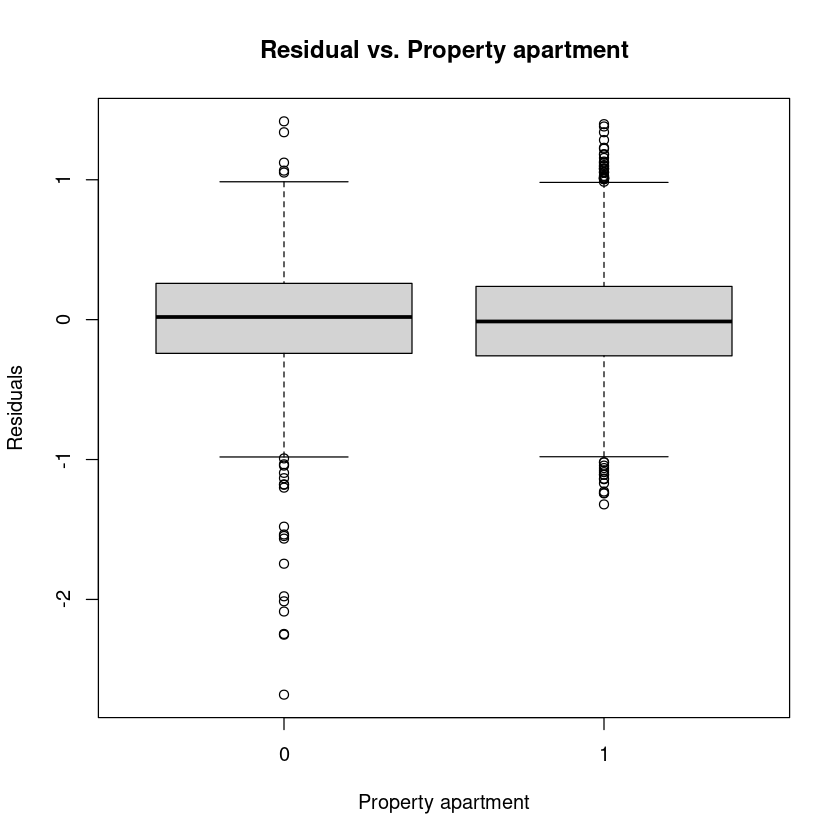

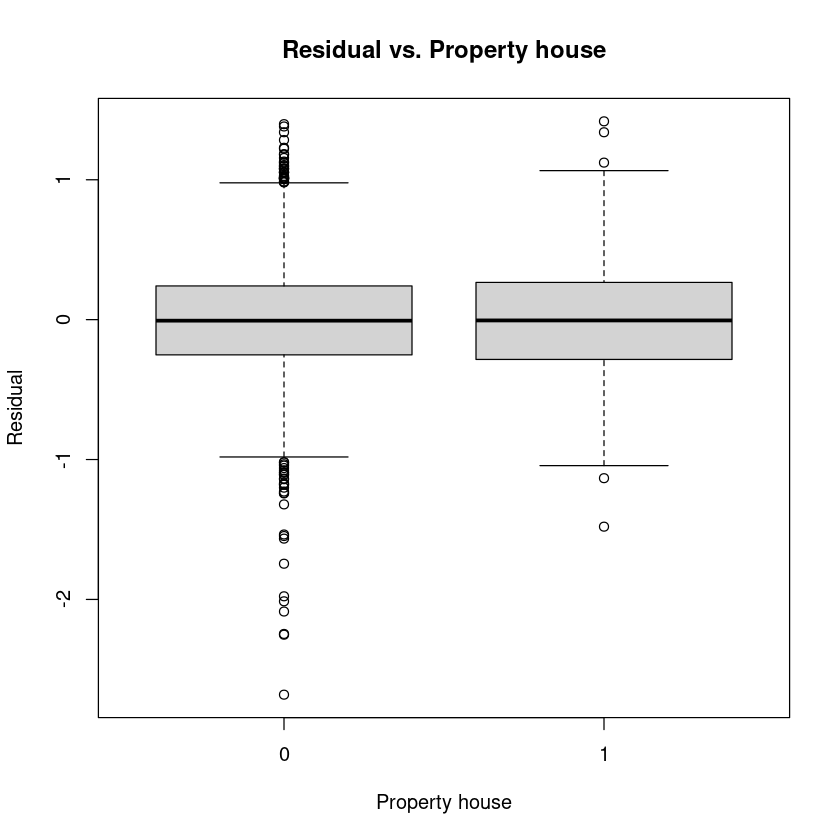

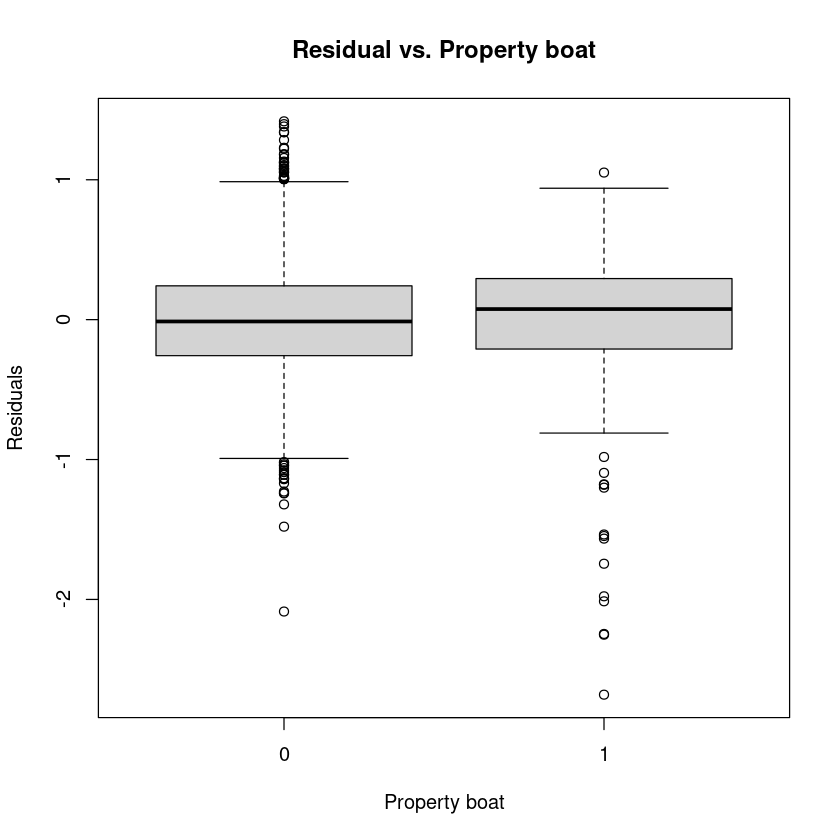

ERROR: Error in eval(predvars, data, env): object 'room_type' not found


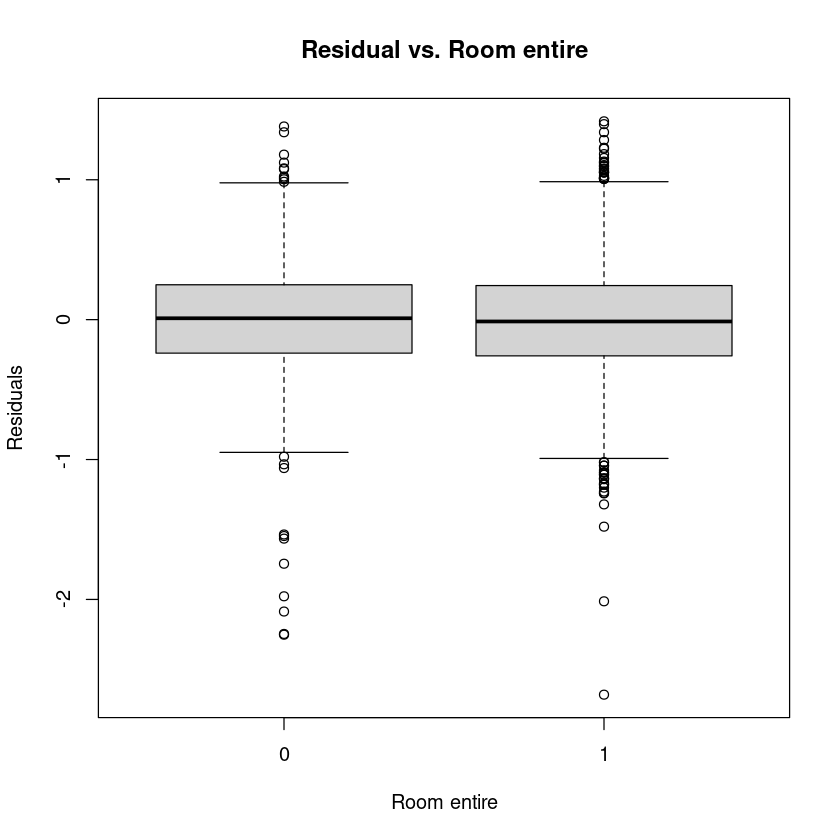

In [51]:
# Scatterplots
# Residual vs. Review ratings
plot(x=review_scores_rating, y=e_hat2, main="Residual vs. Review ratings", ylab="Residuals", xlab="Review ratings")

# Residual vs. Minimum nights
plot(x=minimum_nights, y=e_hat2, main="Residual vs. Minimum nights", ylab="Residuals", xlab="Minimum nights")

# Residual vs. Accommodates
plot(x=accommodates, y=e_hat2, main="Residual vs. Accommodates", ylab="Residuals", xlab="Accommodates")

# Boxplots
# Residual vs. Property apartment
boxplot(e_hat2 ~ property_apmt , main="Residual vs. Property apartment", ylab="Residuals", xlab="Property apartment")

# Residual vs. Property house
boxplot(e_hat2 ~ property_house, main="Residual vs. Property house", ylab="Residual", xlab="Property house")

# Residual vs. Property boat
boxplot(e_hat2 ~ property_boat , main="Residual vs. Property boat", ylab="Residuals", xlab="Property boat")

# Residual vs. Room entire
boxplot(e_hat2 ~ room_entire, main="Residual vs. Room entire", ylab="Residuals", xlab="Room entire")

# Residual vs. Room private
boxplot(e_hat2 ~ room_type, main="Residual vs. Room private", ylab="Residuals", xlab="Room private")

Observations: The fanning pattern from before seems to be much better. However there is still a clustering of points.